<a href="https://colab.research.google.com/github/mostafa1S0/ML-Depi/blob/main/Fraud_Detection_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <ul> Data preprocessing

In [ ]:
#imporatant librabaries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# READ THE DATA and DISPLAY THE HEAD
df=pd.read_csv("Fraud.csv")
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,330,CASH_IN,607193.64,C104196924,15458649.28,16065842.92,C2020875465,3394537.70,2787344.06,0,0
1,281,PAYMENT,3473.75,C1283140808,0.00,0.00,M2044695613,0.00,0.00,0,0
2,322,CASH_OUT,66170.69,C1376666142,32803.00,0.00,C52514926,0.00,66170.69,0,0
3,401,TRANSFER,335384.26,C2136161445,197.00,0.00,C2094766437,5311958.61,5647342.87,0,0
4,180,CASH_IN,234392.25,C801137003,20882.00,255274.25,C1255594470,0.00,0.00,0,0


In [ ]:
# Count Null values
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            600000 non-null  int64  
 1   type            600000 non-null  object 
 2   amount          600000 non-null  float64
 3   nameOrig        600000 non-null  object 
 4   oldbalanceOrg   600000 non-null  float64
 5   newbalanceOrig  600000 non-null  float64
 6   nameDest        600000 non-null  object 
 7   oldbalanceDest  600000 non-null  float64
 8   newbalanceDest  600000 non-null  float64
 9   isFraud         600000 non-null  int64  
 10  isFlaggedFraud  600000 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 50.4+ MB


In [ ]:
#count duplicated values
df.duplicated().sum()

0

Exploratory Data Analysis ( EDA )

In [ ]:
#get a transposed statistical summary of a Data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
step,600000.0,2.432444e+02,1.422543e+02,1.0,155.000,239.000,3.350000e+02,7.430000e+02
amount,600000.0,1.788921e+05,6.014761e+05,0.0,13376.455,74725.020,2.086067e+05,9.244552e+07
oldbalanceOrg,600000.0,8.317255e+05,2.880579e+06,0.0,0.000,14237.100,1.075690e+05,5.039905e+07
newbalanceOrig,600000.0,8.529301e+05,2.916282e+06,0.0,0.000,0.000,1.450344e+05,4.367380e+07
oldbalanceDest,600000.0,1.096497e+06,3.350257e+06,0.0,0.000,130380.745,9.386330e+05,2.511150e+08
newbalanceDest,600000.0,1.219499e+06,3.613941e+06,0.0,0.000,212938.505,1.108755e+06,2.506381e+08
isFraud,600000.0,1.293333e-03,3.593971e-02,0.0,0.000,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,600000.0,0.000000e+00,0.000000e+00,0.0,0.000,0.000,0.000000e+00,0.000000e+00


In [ ]:
# categorical feature analysis
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print('########'*10)

type
CASH_OUT    210964
PAYMENT     203351
CASH_IN     131682
TRANSFER     50073
DEBIT         3930
Name: count, dtype: int64
################################################################################
nameOrig
C1007679575    2
C94830298      2
C393154607     2
C1766564396    2
C856167167     2
              ..
C589919225     1
C755654049     1
C1864440384    1
C747647713     1
C266807496     1
Name: count, Length: 599917, dtype: int64
################################################################################
nameDest
C667346055     14
C20671747      14
C1147977782    14
C453211571     14
C2008647667    14
               ..
M1765304092     1
C793647997      1
M225552548      1
C443445598      1
M517611325      1
Name: count, Length: 437160, dtype: int64
################################################################################


In [ ]:
df.describe(include="object")

,type,nameOrig,nameDest
count,600000,600000,600000
unique,5,599917,437160
top,CASH_OUT,C1007679575,C667346055
freq,210964,2,14


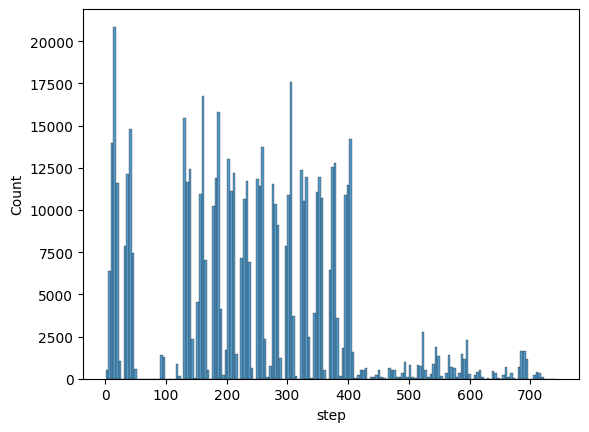

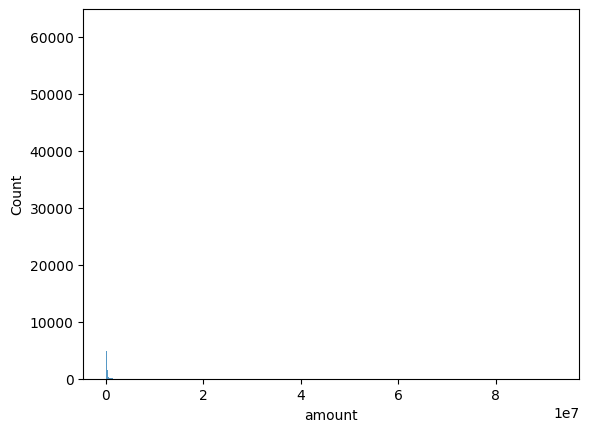

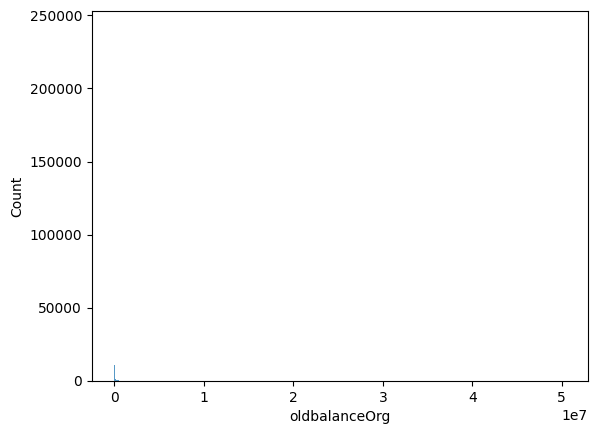

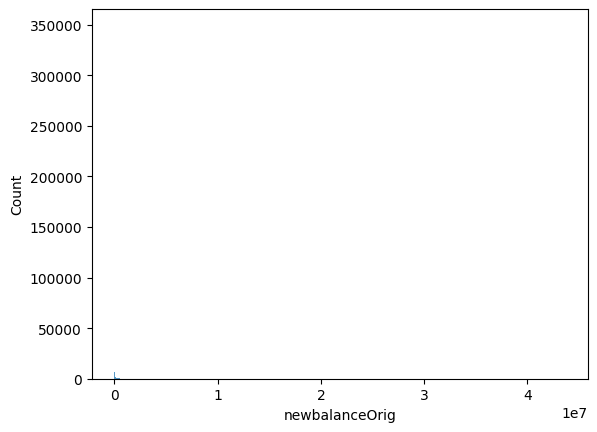

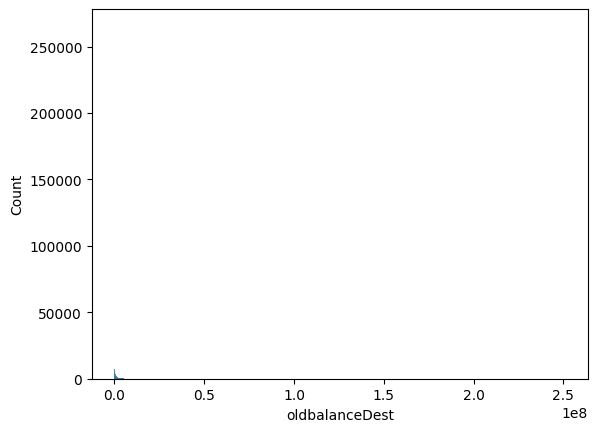

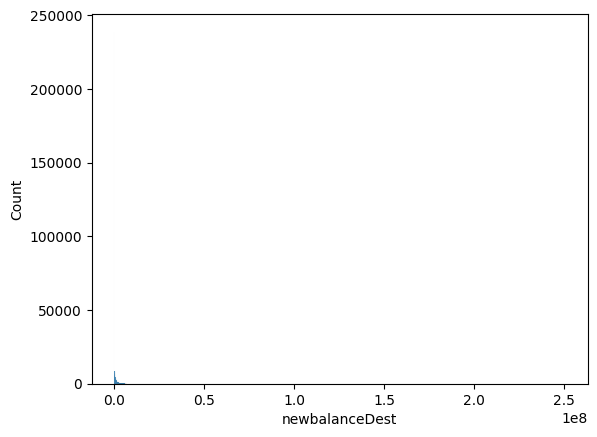

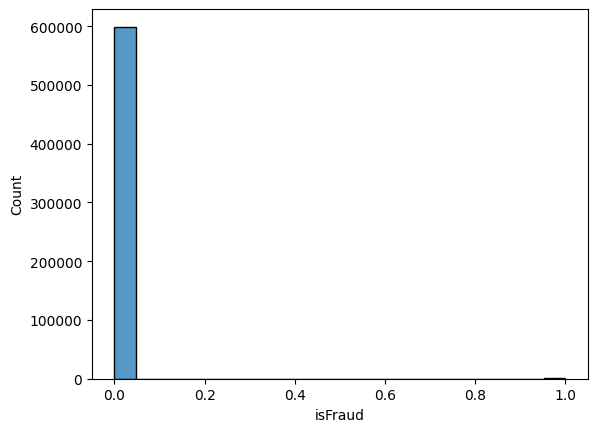

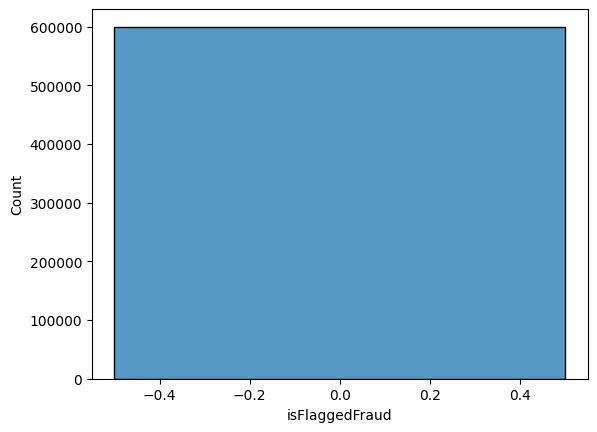

In [ ]:
# visual exploration of all the numerical features
for i in df.select_dtypes(include="number").columns:
    sns.histplot(data=df,x=i)
    plt.show()

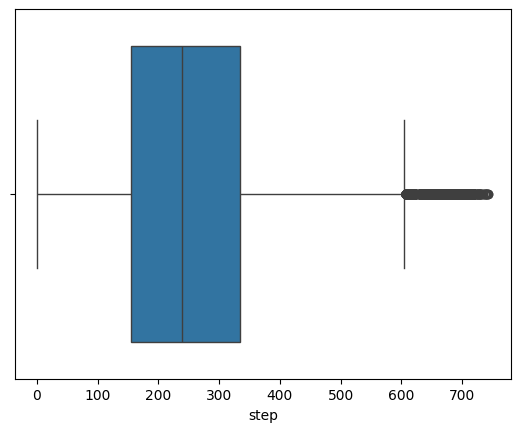

<Figure size 2000x2000 with 0 Axes>

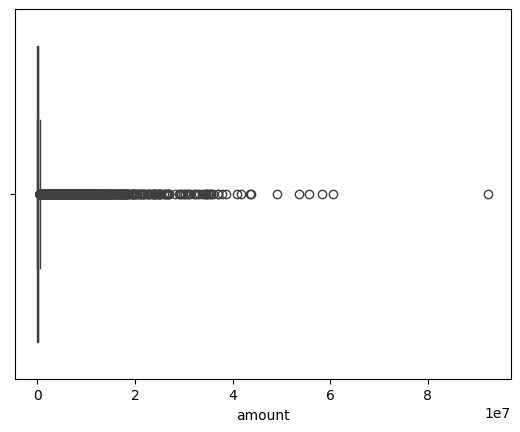

<Figure size 2000x2000 with 0 Axes>

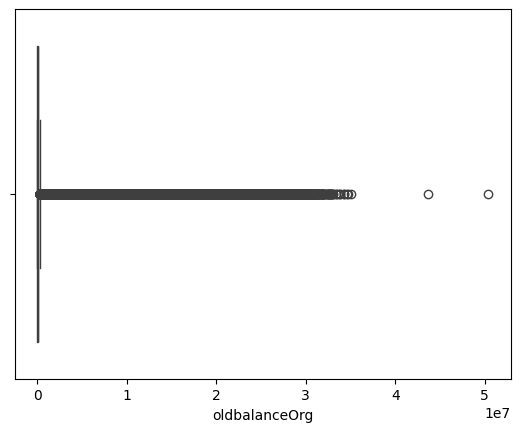

<Figure size 2000x2000 with 0 Axes>

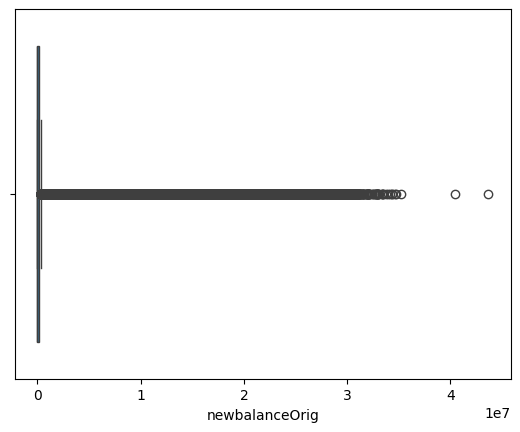

<Figure size 2000x2000 with 0 Axes>

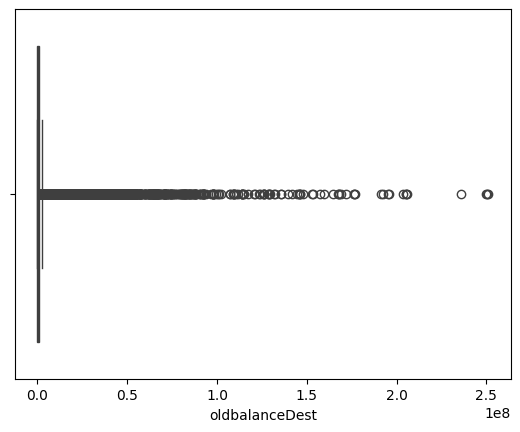

<Figure size 2000x2000 with 0 Axes>

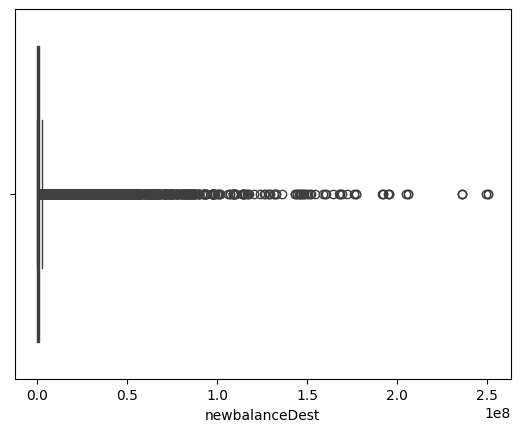

<Figure size 2000x2000 with 0 Axes>

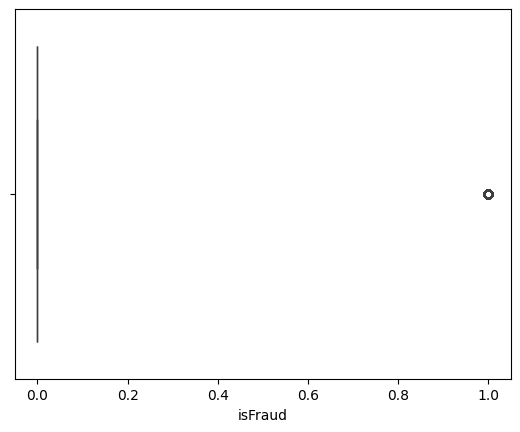

<Figure size 2000x2000 with 0 Axes>

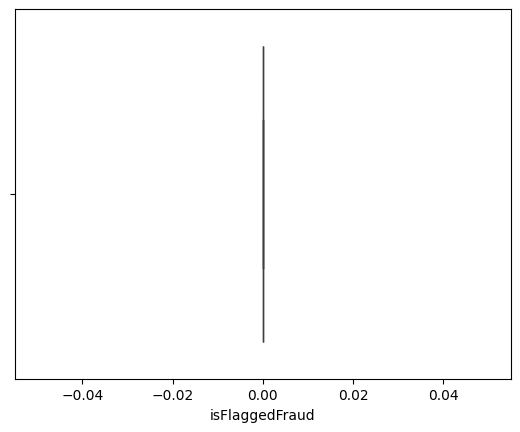

<Figure size 2000x2000 with 0 Axes>

In [ ]:
# detect outlier
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df,x=i)
    plt.figure(figsize=(20,20))
    plt.show()

In [ ]:
df.select_dtypes(include="number").columns

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')

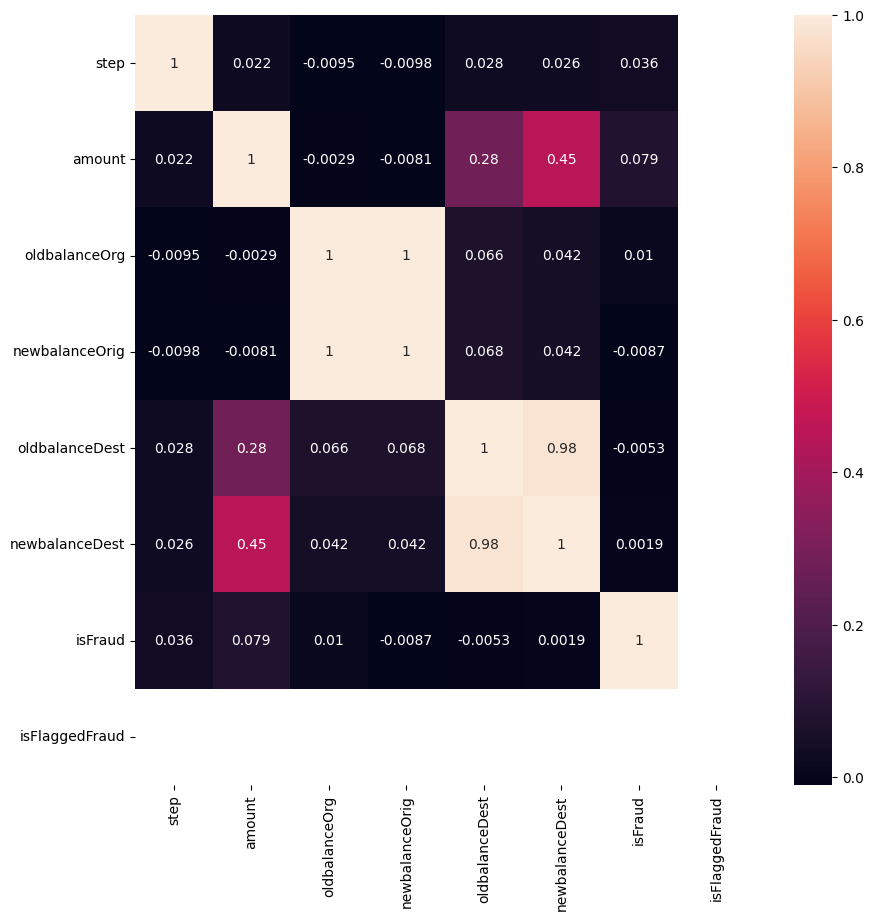

In [ ]:
#correlation with heatmap
s=df.select_dtypes(include="number").corr()
plt.figure(figsize=(10,10))
sns.heatmap(s,annot=True)
plt.show()

In [ ]:
# handle outliers
def handle_outliers_iqr(df, columns):
  """Handles outliers using the Interquartile Range (IQR) method for specified columns in a DataFrame.

  Args:
    df: The pandas DataFrame containing the data.
    columns: A list of column names to handle outliers for.
  """

  for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with the nearest bound
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

  return df

columns_to_handle = ['step' , 'amount', 'oldbalanceOrg', 'oldbalanceDest']
df = handle_outliers_iqr(df, columns_to_handle)

Feature selection

In [ ]:
#1) Their is multi_collinearity between 4 independent features
#2) Best option is to remove 'newbalanceOrig' and 'newbalanceDest', becuase they are less correlated with dependent feature ( "isFraud"),

df = df.drop(["newbalanceOrig" , "newbalanceDest"] , axis=1)

In [ ]:
df = df.drop(["isFlaggedFraud"] , axis=1)

In [ ]:
df = df.drop(["nameOrig" , "nameDest"] , axis=1)

In [ ]:
df

,step,type,amount,oldbalanceOrg,oldbalanceDest,isFraud
0,330.0,CASH_IN,501452.04875,268922.50,2346582.525,0
1,281.0,PAYMENT,3473.75000,0.00,0.000,0
2,322.0,CASH_OUT,66170.69000,32803.00,0.000,0
3,401.0,TRANSFER,335384.26000,197.00,2346582.525,0
4,180.0,CASH_IN,234392.25000,20882.00,0.000,0
...,...,...,...,...,...,...
599995,259.0,CASH_OUT,214536.92000,8038.00,78268.570,0
599996,353.0,CASH_OUT,261789.26000,86576.05,381514.020,0
599997,21.0,CASH_OUT,10186.93000,103123.00,41667.220,0
599998,330.0,TRANSFER,125737.11000,0.00,1013921.690,0


In [ ]:
# unque values of coloum type
df['type'].unique()

array(['CASH_IN', 'PAYMENT', 'CASH_OUT', 'TRANSFER', 'DEBIT'],
      dtype=object)

Feature Encoding using LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])
df

,step,type,amount,oldbalanceOrg,oldbalanceDest,isFraud
0,330.0,0,501452.04875,268922.50,2346582.525,0
1,281.0,3,3473.75000,0.00,0.000,0
2,322.0,1,66170.69000,32803.00,0.000,0
3,401.0,4,335384.26000,197.00,2346582.525,0
4,180.0,0,234392.25000,20882.00,0.000,0
...,...,...,...,...,...,...
599995,259.0,1,214536.92000,8038.00,78268.570,0
599996,353.0,1,261789.26000,86576.05,381514.020,0
599997,21.0,1,10186.93000,103123.00,41667.220,0
599998,330.0,4,125737.11000,0.00,1013921.690,0


In [ ]:
df['type'].unique()

array([0, 3, 1, 4, 2])

In [ ]:
df.isnull().sum()

,0
step,0
type,0
amount,0
oldbalanceOrg,0
oldbalanceDest,0
isFraud,0


</ul>

# <u> Machine Learning By Mostafa Sobhy </ul>

* ## <u>Import important library</u>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

* ## <u>Feature Scaling Apply minMax scaler</u>

In [ ]:
#applay minMax scaler

from sklearn.preprocessing import MinMaxScaler

# Assuming 'df' is your DataFrame and you want to scale numerical features
numerical_features = ['step', 'amount', 'oldbalanceOrg', 'oldbalanceDest']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the selected numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Now your specified columns are scaled between 0 and 1

* ## <u>Handling Un-Balanced Data by Oversampling using SMOTE</u>

In [ ]:
x = df.drop(["isFraud"] , axis=1)
y = df["isFraud"]

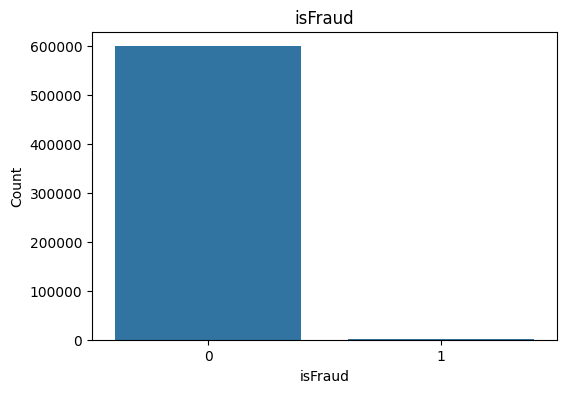

In [ ]:
# Visualize the class distribution

plt.figure(figsize=(6, 4))
sns.countplot(x='isFraud', data=df)
plt.title('isFraud')
plt.xlabel('isFraud')
plt.ylabel('Count')
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE

smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

In [ ]:
# Resample Data

# Create a new DataFrame with resampled data
df_resampled = pd.concat([pd.DataFrame(x_resampled), pd.DataFrame(y_resampled, columns=['isFraud'])], axis=1)

# Check the class distribution after oversampling
isFraud_resampled = df_resampled['isFraud'].value_counts()

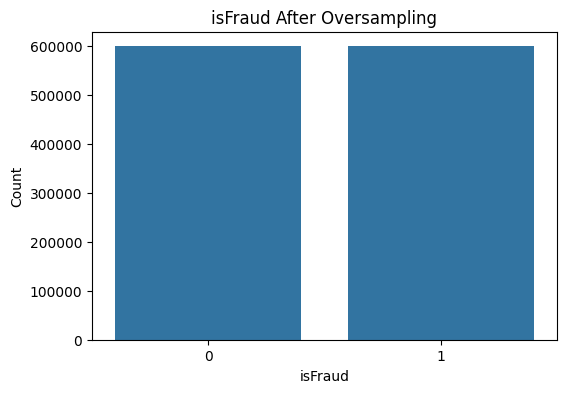

In [ ]:
# Visualize the class distribution after oversampling

plt.figure(figsize=(6, 4))
sns.countplot(x='isFraud', data=df_resampled)
plt.title('isFraud After Oversampling')
plt.xlabel('isFraud')
plt.ylabel('Count')
plt.show()

* ## <u>Spilting Data</u>

In [ ]:
# Separate features and target variable
x = df_resampled.drop('isFraud', axis=1)
y = df_resampled['isFraud']

* ## <u>Feature Engineering</u>

In [ ]:
#raining a Random Forest classifier and displaying the feature importances

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x, y)
feature_importances = rf_model.feature_importances_

In [ ]:
# Create a DataFrame to display feature importances

feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance DataFrame

print(feature_importance_df)

          Feature  Importance
2          amount    0.275720
3   oldbalanceOrg    0.274244
1            type    0.243252
0            step    0.131988
4  oldbalanceDest    0.074796


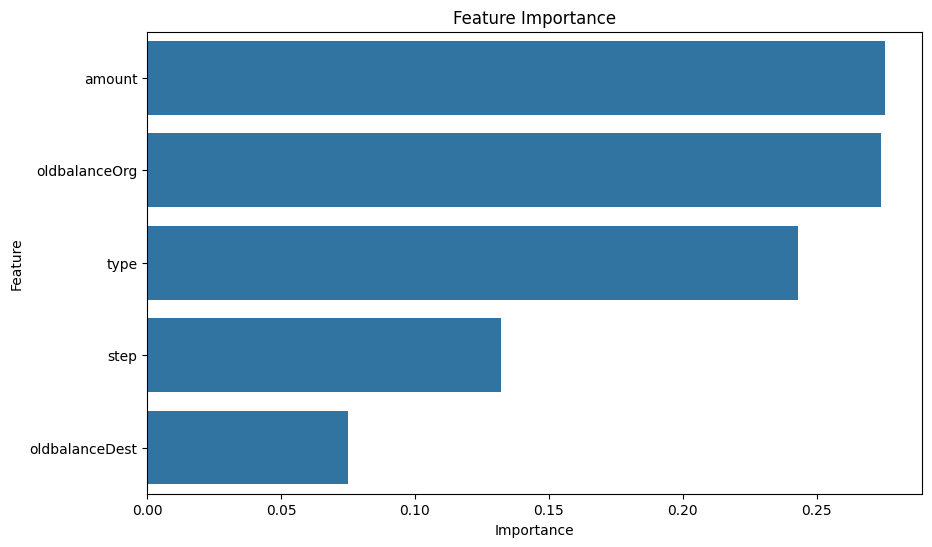

In [ ]:
# Plot feature importances

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

* ## <u>train_test_split</u>

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

* ## <u>Storing Model Data for visualization and Compare  </u>

In [ ]:
Model_Name_all = ["LogisticRegression"  , "DecisionTreeClassifier" , "RandomForestClassifier" , "GradientBoostingClassifier" , "KNeighborsClassifier"]
accuracy_all = []
recall_all = []
f1_all = []
precision_all = []

* ## <u>Import Models</u>

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score , recall_score , f1_score , precision_score ,confusion_matrix , classification_report

* ## <u>LogisticRegression Model</u>

In [ ]:
# Train Model
model_lg = LogisticRegression()
model_lg.fit(x_train, y_train)
model_lg.score(x_train, y_train)
y_pred_lg = model_lg.predict(x_test)
model_lg.predict_proba(x_test)

array([[0.84672831, 0.15327169],
       [0.74463712, 0.25536288],
       [0.65643104, 0.34356896],
       ...,
       [0.03586368, 0.96413632],
       [0.32153741, 0.67846259],
       [0.67687826, 0.32312174]])

Accuracy Score Is: 0.8228461763110685
Recall Score Is: 0.7868363192522801
F1 Score Is: 0.8159427828348504
Precision Score Is: 0.8472853631968889
LogisticRegression Report Is:
               precision    recall  f1-score   support

           0       0.80      0.86      0.83    120073
           1       0.85      0.79      0.82    119617

    accuracy                           0.82    239690
   macro avg       0.82      0.82      0.82    239690
weighted avg       0.82      0.82      0.82    239690



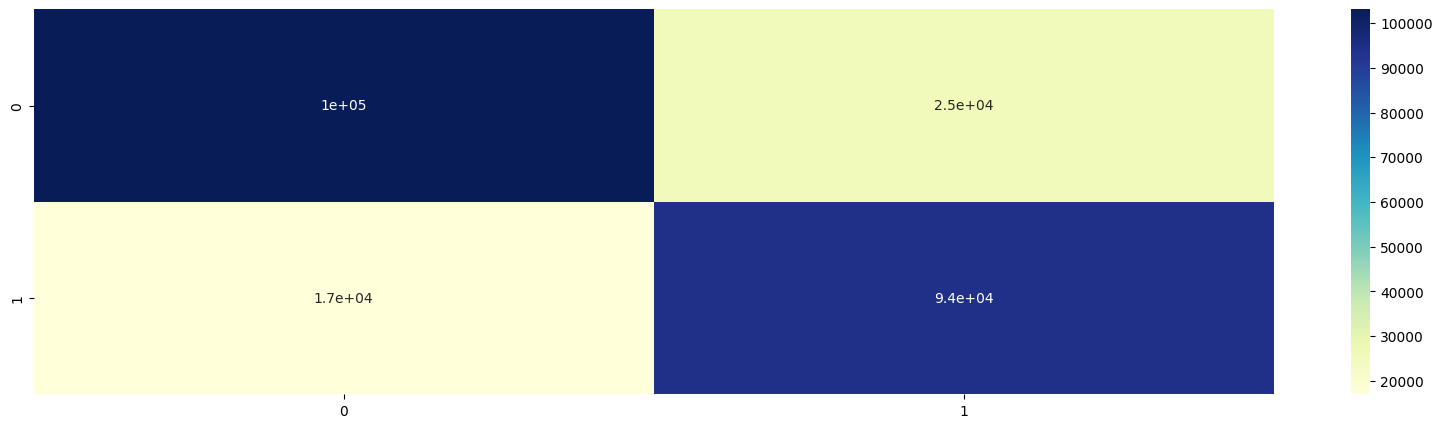

In [ ]:
# Evaluate the model
accuracy_lg = accuracy_score(y_test, y_pred_lg)
precision_lg = precision_score(y_test, y_pred_lg)
recall_lg = recall_score(y_test, y_pred_lg)
f1_lg = f1_score(y_test, y_pred_lg)
confusion_lg = confusion_matrix(y_test, y_pred_lg)
report_lg = classification_report(y_test, y_pred_lg)

plt.figure(figsize=(20,5))
sns.heatmap(confusion_matrix(y_pred_lg , y_test) , annot=True , cmap="YlGnBu")
print("Accuracy Score Is:" , accuracy_lg)
print("Recall Score Is:" , recall_lg)
print("F1 Score Is:", f1_lg)
print("Precision Score Is:" , precision_lg)
print("LogisticRegression Report Is:\n" , report_lg)
plt.show()

In [ ]:
# storing model data
accuracy_all.append(accuracy_lg)
recall_all.append(recall_lg)
f1_all.append(f1_lg)
precision_all.append(precision_lg)

In [ ]:
import statsmodels.api as sm

x_train_with_constant = sm.add_constant(x_train)

# Fit the logistic regression model
logit_model = sm.Logit(y_train, x_train_with_constant).fit()

# Print the model summary
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.409855
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                isFraud   No. Observations:               958758
Model:                          Logit   Df Residuals:                   958752
Method:                           MLE   Df Model:                            5
Date:                Thu, 19 Dec 2024   Pseudo R-squ.:                  0.4087
Time:                        23:31:11   Log-Likelihood:            -3.9295e+05
converged:                       True   LL-Null:                   -6.6456e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -3.9734      0.010   -414.182      0.000      -3.992      -3.955
step             

* ## <u>DecisionTreeClassifier Model</u>

In [ ]:
# Train Model
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(x_train, y_train)
model_dt.score(x_train, y_train)
y_pred_dt = model_dt.predict(x_test)
model_dt.predict_proba(x_test)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

Accuracy Score Is: 0.9982685969377112
Recall Score Is: 0.9989048379410953
F1 Score Is: 0.9982664054439047
Precision Score Is: 0.9976287885113133
DecisionTree Report Is:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    120073
           1       1.00      1.00      1.00    119617

    accuracy                           1.00    239690
   macro avg       1.00      1.00      1.00    239690
weighted avg       1.00      1.00      1.00    239690



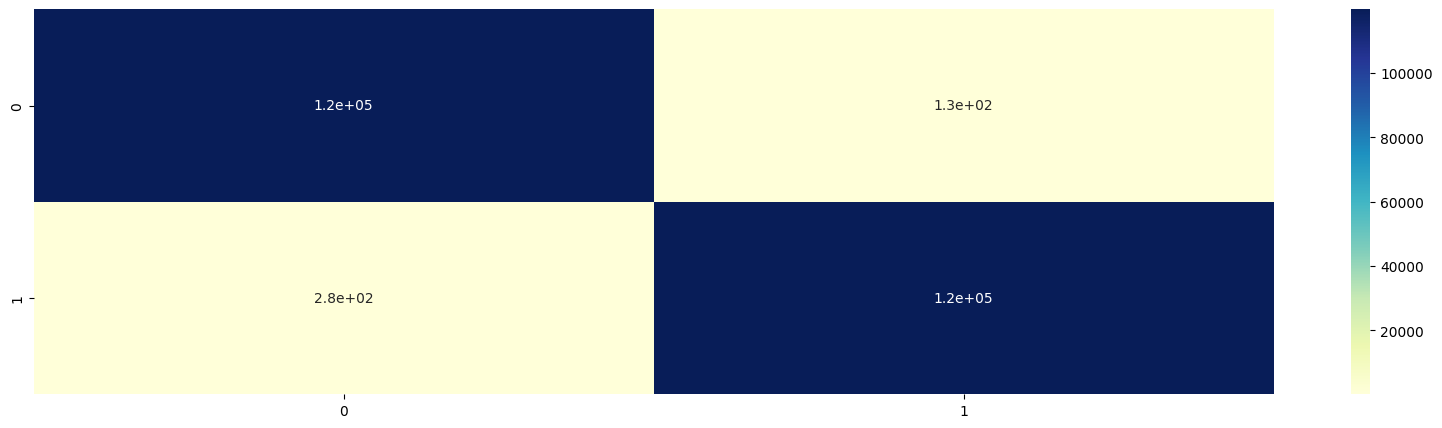

In [ ]:
# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
confusion_dt = confusion_matrix(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)

plt.figure(figsize=(20,5))
sns.heatmap(confusion_matrix(y_pred_dt , y_test) , annot=True , cmap="YlGnBu")
print("Accuracy Score Is:" , accuracy_dt)
print("Recall Score Is:" , recall_dt)
print("F1 Score Is:", f1_dt)
print("Precision Score Is:" , precision_dt)
print("DecisionTree Report Is:\n" , report_dt)
plt.show()

In [ ]:
# storing model data
accuracy_all.append(accuracy_dt)
recall_all.append(recall_dt)
f1_all.append(f1_dt)
precision_all.append(precision_dt)

* ## <u>RandomForestClassifier Model</u>

In [ ]:
# Train Model
model_RanF = RandomForestClassifier(random_state=42)
model_RanF.fit(x_train, y_train)
model_RanF.score(x_train, y_train)
y_pred_RanF = model_RanF.predict(x_test)
model_RanF.predict_proba(x_test)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

Accuracy Score Is: 0.9988902332179065
Recall Score Is: 0.9997324794970615
F1 Score Is: 0.9988890559481448
Precision Score Is: 0.9980470543069129
RandomForest Report Is:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    120073
           1       1.00      1.00      1.00    119617

    accuracy                           1.00    239690
   macro avg       1.00      1.00      1.00    239690
weighted avg       1.00      1.00      1.00    239690



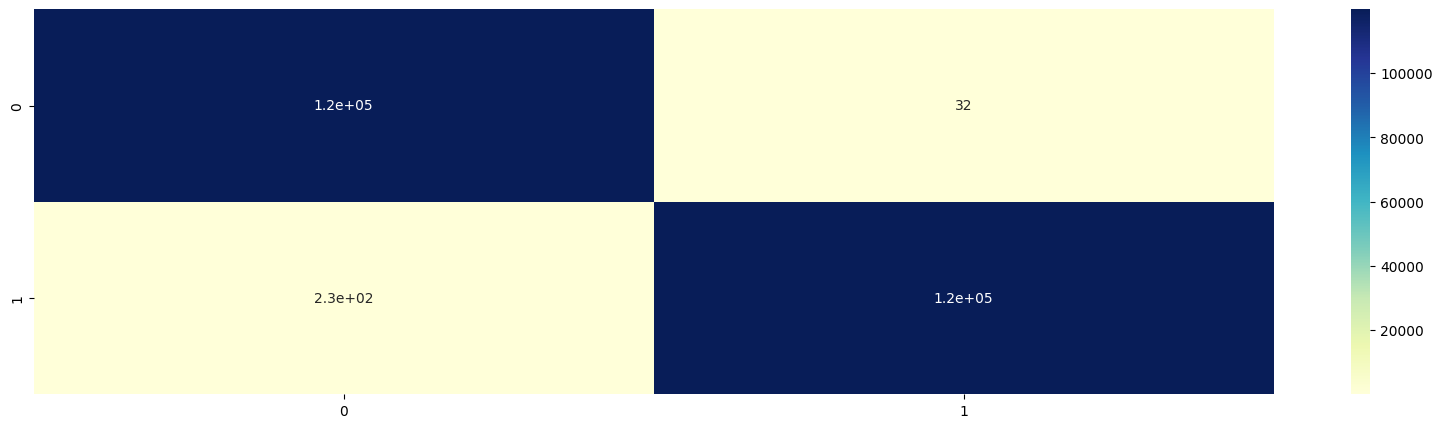

In [ ]:
# Evaluate the model
accuracy_RanF = accuracy_score(y_test, y_pred_RanF)
precision_RanF = precision_score(y_test, y_pred_RanF)
recall_RanF = recall_score(y_test, y_pred_RanF)
f1_RanF = f1_score(y_test, y_pred_RanF)
confusion_RanF = confusion_matrix(y_test, y_pred_RanF)
report_RanF = classification_report(y_test, y_pred_RanF)

plt.figure(figsize=(20,5))
sns.heatmap(confusion_matrix(y_pred_RanF , y_test) , annot=True , cmap="YlGnBu")
print("Accuracy Score Is:" , accuracy_RanF)
print("Recall Score Is:" , recall_RanF)
print("F1 Score Is:", f1_RanF)
print("Precision Score Is:" , precision_RanF)
print("RandomForest Report Is:\n" , report_RanF)
plt.show()

In [ ]:
# storing model data
accuracy_all.append(accuracy_RanF)
recall_all.append(recall_RanF)
f1_all.append(f1_RanF)
precision_all.append(precision_RanF)

* ## <u>GradientBoostingClassifier Model</u>

In [ ]:
# Train Model
model_Grad = GradientBoostingClassifier(random_state=42)
model_Grad.fit(x_train, y_train)
model_Grad.score(x_train, y_train)
y_pred_Grad = model_Grad.predict(x_test)
model_Grad.predict_proba(x_test)

array([[0.99834029, 0.00165971],
       [0.992918  , 0.007082  ],
       [0.99312428, 0.00687572],
       ...,
       [0.00849115, 0.99150885],
       [0.96415435, 0.03584565],
       [0.998116  , 0.001884  ]])

Accuracy Score Is: 0.9821143977637782
Recall Score Is: 0.9943319093439895
F1 Score Is: 0.9822971940619
Precision Score Is: 0.9705503149786207
GradientBoosting Report Is:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98    120073
           1       0.97      0.99      0.98    119617

    accuracy                           0.98    239690
   macro avg       0.98      0.98      0.98    239690
weighted avg       0.98      0.98      0.98    239690



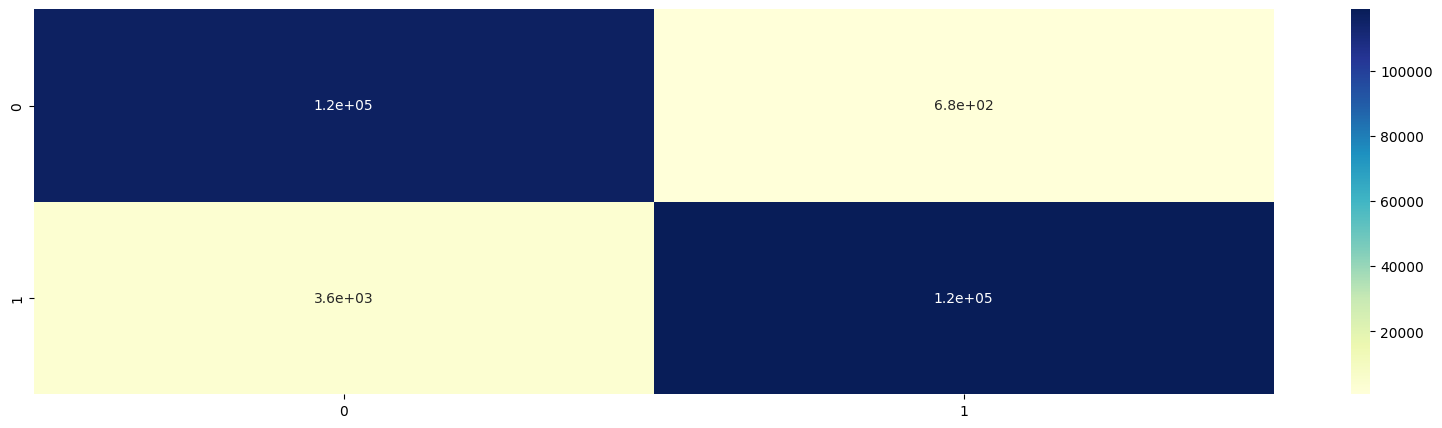

In [ ]:
# Evaluate the model
accuracy_Grad = accuracy_score(y_test, y_pred_Grad)
precision_Grad = precision_score(y_test, y_pred_Grad)
recall_Grad = recall_score(y_test, y_pred_Grad)
f1_Grad = f1_score(y_test, y_pred_Grad)
confusion_Grad = confusion_matrix(y_test, y_pred_Grad)
report_Grad = classification_report(y_test, y_pred_Grad)

plt.figure(figsize=(20,5))
sns.heatmap(confusion_matrix(y_pred_Grad , y_test) , annot=True , cmap="YlGnBu")
print("Accuracy Score Is:" , accuracy_Grad)
print("Recall Score Is:" , recall_Grad)
print("F1 Score Is:", f1_Grad)
print("Precision Score Is:" , precision_Grad)
print("GradientBoosting Report Is:\n" , report_Grad)
plt.show()

In [ ]:
# storing model data
accuracy_all.append(accuracy_Grad)
recall_all.append(recall_Grad)
f1_all.append(f1_Grad)
precision_all.append(precision_Grad)

* ## <u>KNeighborsClassifier Model</u>

In [ ]:
# Train Model
model_KN = KNeighborsClassifier(n_neighbors=5)
model_KN.fit(x_train, y_train)
model_KN.score(x_train, y_train)
y_pred_KN = model_KN.predict(x_test)
model_KN.predict_proba(x_test)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

Accuracy Score Is: 0.9972756477116275
Recall Score Is: 0.9999665599371327
F1 Score Is: 0.9972777942212532
Precision Score Is: 0.9946034491360529
KNeighbors Report Is:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    120073
           1       0.99      1.00      1.00    119617

    accuracy                           1.00    239690
   macro avg       1.00      1.00      1.00    239690
weighted avg       1.00      1.00      1.00    239690



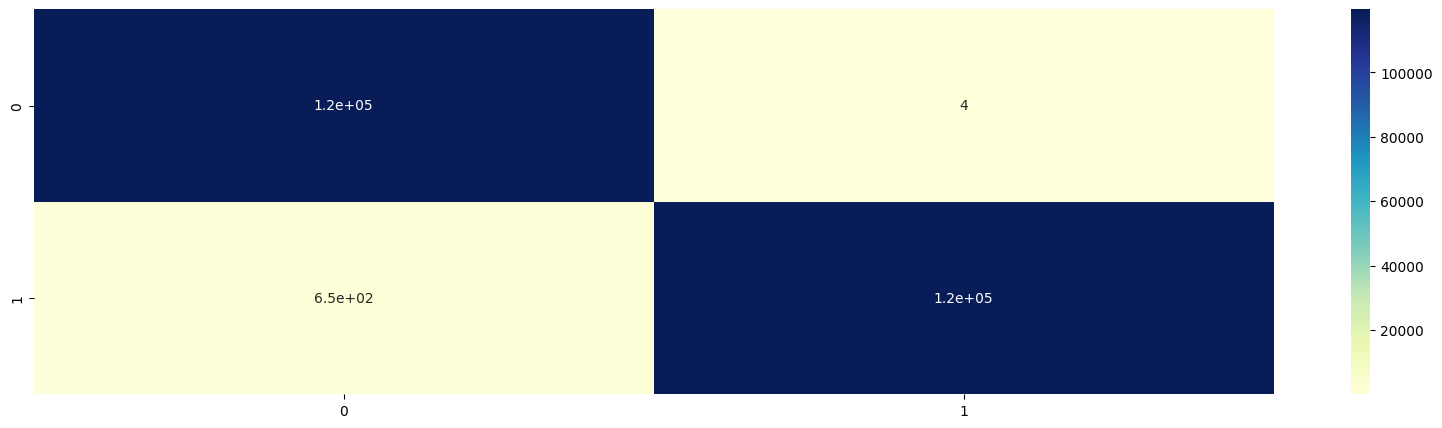

In [ ]:
# Evaluate the model
accuracy_KN = accuracy_score(y_test, y_pred_KN)
precision_KN = precision_score(y_test, y_pred_KN)
recall_KN = recall_score(y_test, y_pred_KN)
f1_KN = f1_score(y_test, y_pred_KN)
confusion_KN = confusion_matrix(y_test, y_pred_KN)
report_KN = classification_report(y_test, y_pred_KN)

plt.figure(figsize=(20,5))
sns.heatmap(confusion_matrix(y_pred_KN , y_test) , annot=True , cmap="YlGnBu")
print("Accuracy Score Is:" , accuracy_KN)
print("Recall Score Is:" , recall_KN)
print("F1 Score Is:", f1_KN)
print("Precision Score Is:" , precision_KN)
print("KNeighbors Report Is:\n" , report_KN)
plt.show()

In [ ]:
# storing model data
accuracy_all.append(accuracy_KN)
recall_all.append(recall_KN)
f1_all.append(f1_KN)
precision_all.append(precision_KN)

* ## <u>Ploting Model data and Compare</u>

In [ ]:
final_all = pd.DataFrame({"Modele Name": Model_Name_all, "accuracy ": accuracy_all, "Recall ": recall_all, "F1 ": f1_all, "Precision ": precision_all})

final_all.style.background_gradient(cmap="YlGnBu", axis=0)

,Modele Name,accuracy,Recall,F1,Precision
0,LogisticRegression,0.822846,0.786836,0.815943,0.847285
1,DecisionTreeClassifier,0.998269,0.998905,0.998266,0.997629
2,RandomForestClassifier,0.998890,0.999732,0.998889,0.998047
3,GradientBoostingClassifier,0.982114,0.994332,0.982297,0.970550
4,KNeighborsClassifier,0.997276,0.999967,0.997278,0.994603


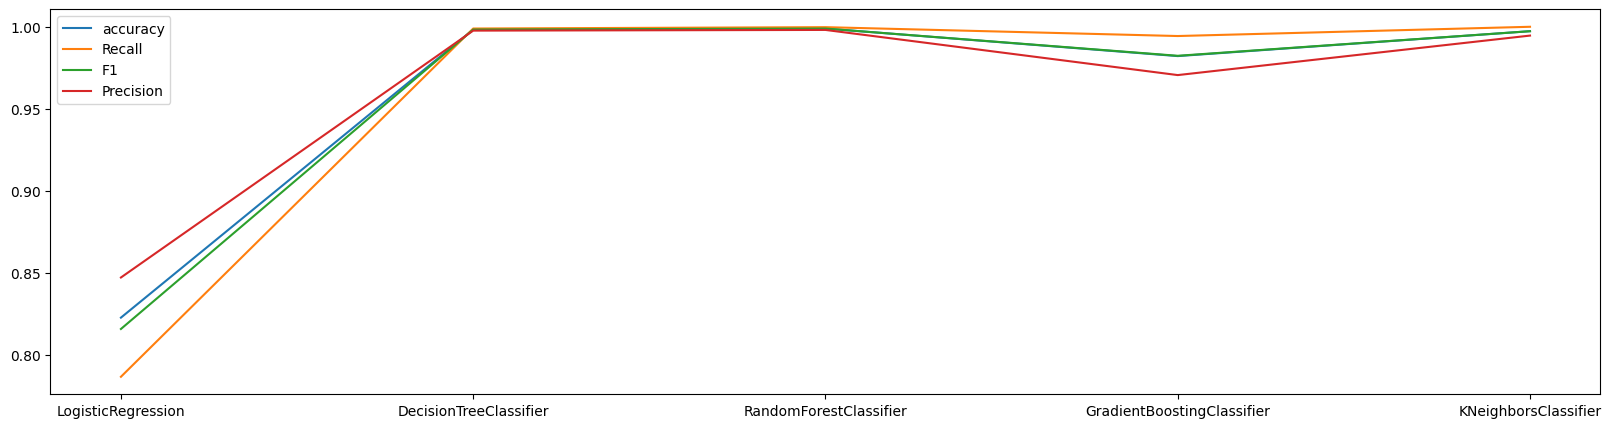

In [ ]:
fig ,ax = plt.subplots(figsize=(20,5))

plt.plot(final_all["Modele Name"] , accuracy_all , label="accuracy" )
plt.plot(final_all["Modele Name"] , recall_all , label="Recall" )
plt.plot(final_all["Modele Name"] , f1_all , label="F1" )
plt.plot(final_all["Modele Name"] , precision_all , label="Precision" )

plt.legend()
plt.show()

* ## <u>Saveing Model</u>

In [ ]:
import pickle

filename = "Fraud_RandomForest.sav"
pickle.dump(model_RanF , open(filename,"wb"))

In [ ]:
pickle.dump(scaler,open('scaler.sav','wb'))